# Dataset EDA
## _"Enriched Employees dataset"_

[DATASET ORIGIN](https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out)

### Descripción de Features:
* **Employee ID:** El ID único asignado a cada empleado *(ejemplo: fffe390032003000)*.
* **Date of Joining:** La fecha en que el empleado se unió a la organización *(ejemplo: 2008-12-30)*.
* **Gender:** El género del empleado *(Masculino/Femenino)*.
* **Company Type:** El tipo de empresa donde trabaja el empleado *(Servicios/Producto)*.
* **WFH Setup Available:** Si la modalidad de trabajo desde casa está disponible para el empleado *(Sí/No)*.
* **Designation:** El nivel o cargo del empleado en la organización.
    * En un rango de **[0.0, 5.0]**, donde un número mayor indica un cargo más alto.
* **Resource Allocation:** La cantidad de recursos asignados al empleado, medido en horas de trabajo.
    * En un rango de **[1.0, 10.0]**, donde un valor más alto significa más recursos asignados.
* **Mental Fatigue Score:** El nivel de fatiga mental que experimenta el empleado.
    * En un rango de **[0.0, 10.0]**, donde 0.0 significa sin fatiga y 10.0 significa fatiga completa.
* **Burn Rate:** El valor que necesitamos predecir; indica la tasa de agotamiento (burnout) del empleado.
    * En un rango de **[0.0, 1.0]**, donde un valor más alto significa un mayor nivel de burnout.

#### Enriquecido con 8 features sintéticas _(provistas por el dataset)_:

* **Years in Company:** Una métrica calculada que representa la antigüedad del empleado. Se obtiene restando la `Date of Joining` de la fecha actual de la recolección de datos.
* **Work Hours per Week:** El número promedio de horas que un empleado reporta trabajar semanalmente.
* **Sleep Hours:** El número promedio de horas que un empleado reporta dormir por noche.
* **Work-Life Balance Score:** Una calificación subjetiva, usualmente en una escala de 1 a 5, donde el empleado evalúa la calidad de su equilibrio entre la vida personal y laboral.
* **Manager Support Score:** Una calificación subjetiva donde el empleado puntúa el nivel de apoyo que siente recibir de su supervisor directo.
* **Deadline Pressure Score:** Una calificación subjetiva que indica el nivel de estrés o presión que el empleado percibe debido a las fechas de entrega.
* **Team Size:** El número de personas que forman parte del equipo directo del empleado. Este dato puede provenir de registros de RR.HH. o ser auto-reportado.
* **Recognition Frequency:** Una medida ordinal que indica qué tan a menudo el empleado siente que su trabajo es reconocido. Probablemente se basa en una escala como "Nunca", "A veces", "Frecuentemente".

---
### Importación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/enriched_employee_dataset.csv")

## Identificación de Features

In [3]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Years in Company',
       'Work Hours per Week', 'Sleep Hours', 'Work-Life Balance Score',
       'Manager Support Score', 'Deadline Pressure Score', 'Team Size',
       'Recognition Frequency'],
      dtype='object')

In [4]:
# Remove spaces in columns names for accessing by properties
df.columns = [c.replace(' ', '_') for c in df.columns]

In [14]:
total_employes = len(df)
print("Number of employees' records:", total_employes)

Number of employees' records: 22750


In [ ]:
print("Dataset dates range:", df.Date_of_Joining.min(), "to", df.Date_of_Joining.max())

Dataset dates range: 2008-01-01 to 2008-12-31


Dado que el dataset comprende empleados que entraron un mismo año, la feature Years_in_Company no aportará valor ya que será para todos similar.

In [6]:
df.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate,Years_in_Company,Work_Hours_per_Week,Sleep_Hours,Work-Life_Balance_Score,Manager_Support_Score,Deadline_Pressure_Score,Team_Size,Recognition_Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              22750 non-null  object 
 1   Date_of_Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company_Type             22750 non-null  object 
 4   WFH_Setup_Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource_Allocation      21369 non-null  float64
 7   Mental_Fatigue_Score     20633 non-null  float64
 8   Burn_Rate                21626 non-null  float64
 9   Years_in_Company         22750 non-null  int64  
 10  Work_Hours_per_Week      22750 non-null  int64  
 11  Sleep_Hours              22750 non-null  float64
 12  Work-Life_Balance_Score  22750 non-null  int64  
 13  Manager_Support_Score    22750 non-null  int64  
 14  Deadline_Pressure_Scor

In [11]:
# Verifica porcentaje de nulos por columna
(df.isna().sum() / total_employes * 100).round(0).sort_values(ascending=False)

Mental_Fatigue_Score       9.0
Resource_Allocation        6.0
Burn_Rate                  5.0
Employee_ID                0.0
Date_of_Joining            0.0
WFH_Setup_Available        0.0
Company_Type               0.0
Gender                     0.0
Designation                0.0
Years_in_Company           0.0
Work_Hours_per_Week        0.0
Sleep_Hours                0.0
Work-Life_Balance_Score    0.0
Manager_Support_Score      0.0
Deadline_Pressure_Score    0.0
Team_Size                  0.0
Recognition_Frequency      0.0
dtype: float64

Existen valores nulos en:
- Mental Fatigue Score (9%)
- Resource Allocation (6%)
- Burn Rate (5%)

> **NOTA:** Para imputar los valores nulos se utilizó `IterativeImputer` de la librería **scikit-learn**. Es un imputador multivariante que estima de forma iterativa los valores faltantes en una variable utilizando las demás variables como predictores. Se le conoce popularmente como Imputación Encadenada o Imputación por Ecuaciones Múltiples (MICE).

In [30]:
df.describe(include='object').T

,count,unique,top,freq
Employee_ID,22750,22750,fffe32003000360033003200,1
Date_of_Joining,22750,366,2008-01-06,86
Gender,22750,2,Female,11908
Company_Type,22750,2,Service,14833
WFH_Setup_Available,22750,2,Yes,12290


In [29]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Designation,22750.0,2.178725,1.135145,0.0,1.00,2.00,3.00,5.0
Resource_Allocation,21369.0,4.481398,2.047211,1.0,3.00,4.00,6.00,10.0
Mental_Fatigue_Score,20633.0,5.728188,1.920839,0.0,4.60,5.90,7.10,10.0
Burn_Rate,21626.0,0.452005,0.198226,0.0,0.31,0.45,0.59,1.0
Years_in_Company,22750.0,16.015956,0.125308,16.0,16.00,16.00,16.00,17.0
Work_Hours_per_Week,22750.0,47.364747,7.651106,35.0,40.00,49.00,54.00,59.0
Sleep_Hours,22750.0,6.153965,0.892709,3.4,5.40,6.00,6.90,9.1
Work-Life_Balance_Score,22750.0,2.595604,1.402847,1.0,1.00,2.00,4.00,5.0
Manager_Support_Score,22750.0,2.874681,1.281129,1.0,2.00,3.00,4.00,5.0
Deadline_Pressure_Score,22750.0,3.400132,1.409178,1.0,2.00,4.00,5.00,5.0


In [95]:
# Transformar columnas categóricas a numéricas para el análisis de correlación
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [99]:
categorical_cols = ['Employee_ID', 'Date_of_Joining']
numerical_cols = df.select_dtypes(include=['number']).columns.difference(categorical_cols)

## Distribución

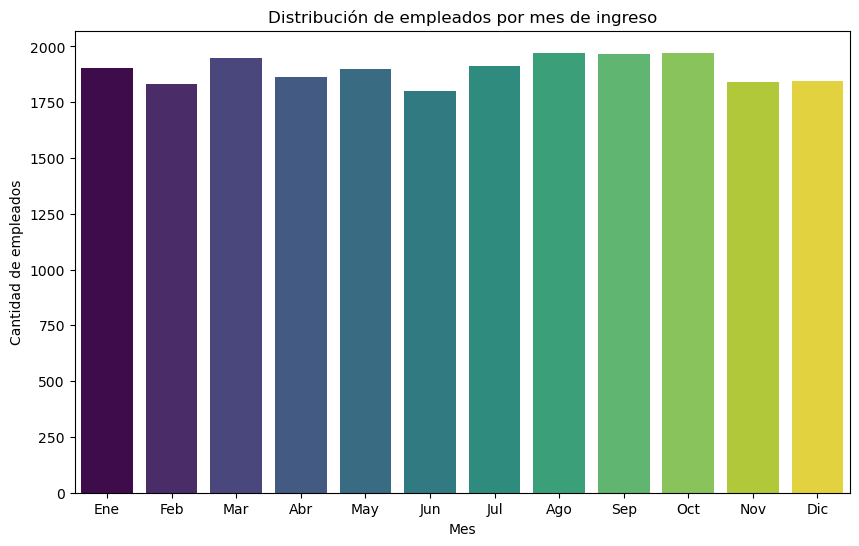

In [ ]:
# Extraer el mes de la columna Date_of_Joining
df['Month_of_Joining'] = pd.to_datetime(df['Date_of_Joining']).dt.month

# Graficar la distribución de empleados por mes de ingreso
plt.figure(figsize=(10, 6))
sns.countplot(x='Month_of_Joining', hue='Month_of_Joining', data=df, palette='viridis', legend=False)
plt.title('Distribución de empleados por mes de ingreso')
plt.xlabel('Mes')
plt.ylabel('Cantidad de empleados')
plt.xticks(ticks=range(0,12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

Podemos ver una distribución simétrica de datapoints para cada mes.

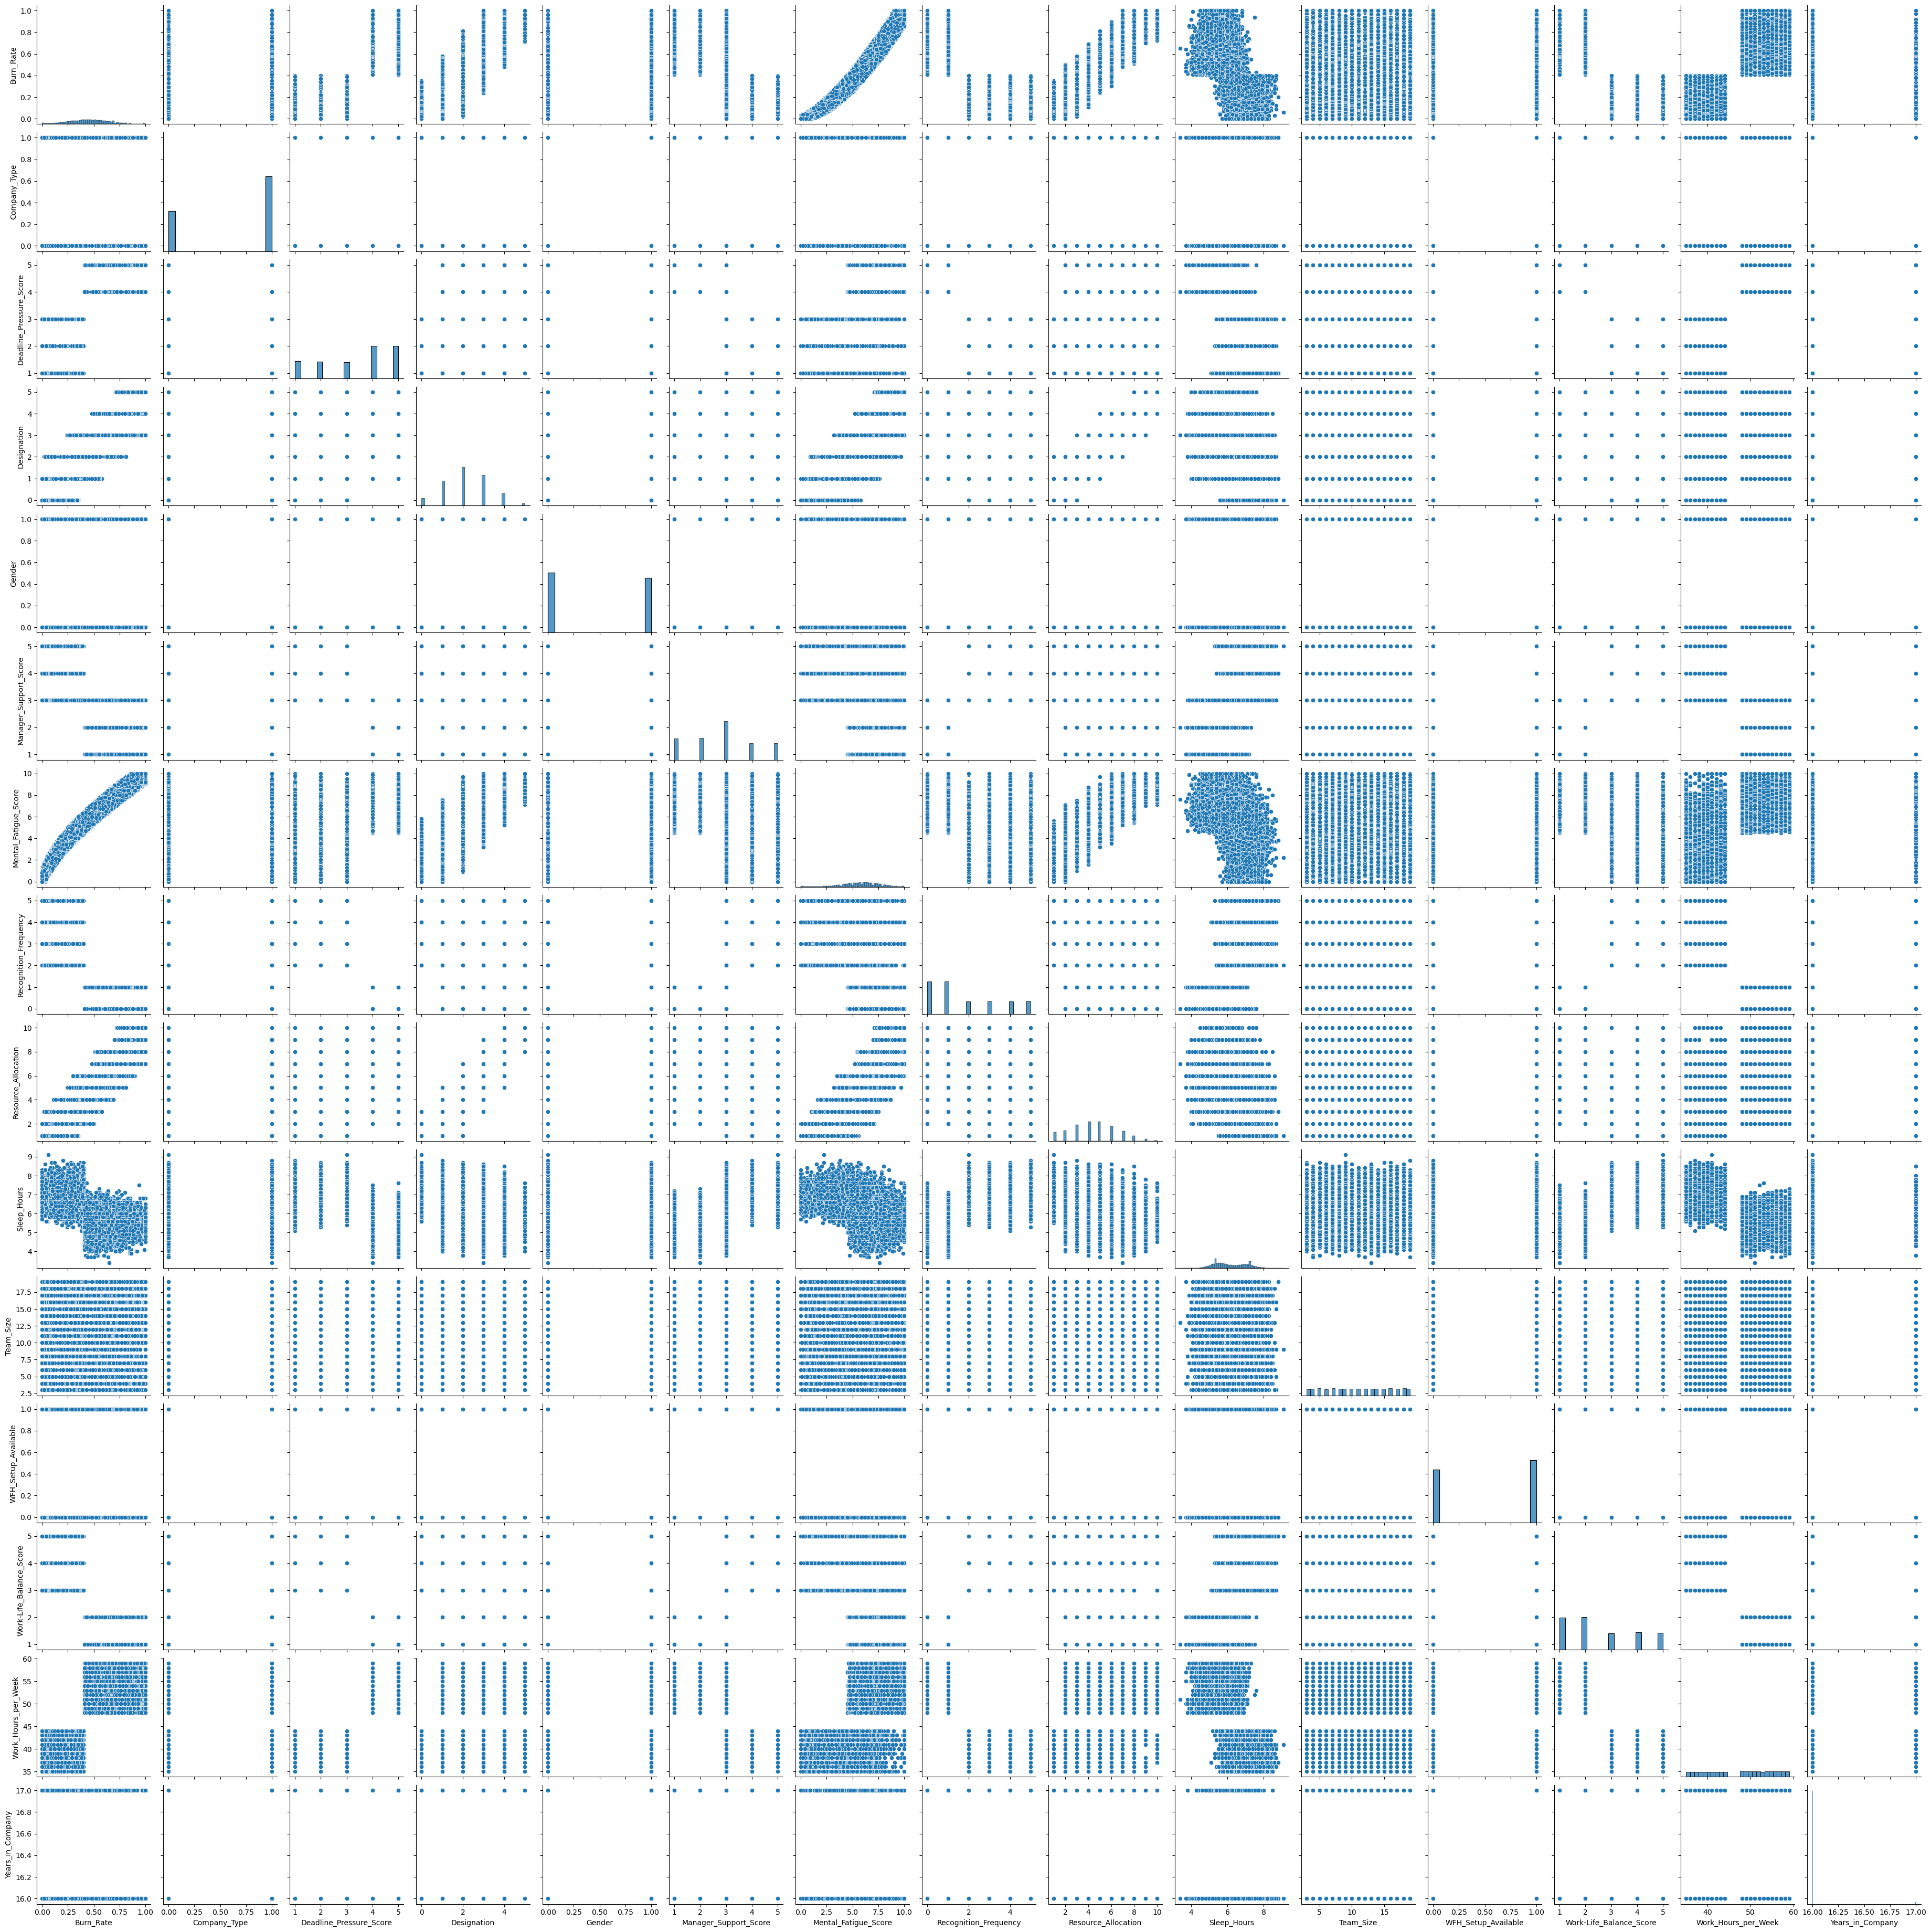

In [ ]:
%matplotlib inline
sns.pairplot(df[numerical_cols])

#### Clusters
- Se puede destacar visualmente la fuerte correlación lineal entre entre `Mental Fatigue Score` y `Burn Rate` (continuas), `Designation` y `Resource Allocation` (discretas).
- También es notable la presencia de dos grupos diferenciados en `Work Hours per Week` y `Sleep Hours`.
- Estos a su vez, están fuertemente relacionados con `Mental Fatigue Score`y `Burn Rate`.
- También se distinguen estos grupos, pero no tan diferenciados, en `Work-Life Balance Score`, `Manager Support Score`, `Deadline Pressure Score` y `Recognition Frequency`

In [31]:
# # Configuración de estilo de Seaborn para gráficos limpios
# sns.set_theme(style="whitegrid")
# plt.rcParams['figure.figsize'] = (15, 12)
# plt.rcParams['font.size'] = 10

# 2. Columnas Numéricas con Valores Faltantes (Nulos)
n_samples = len(df)
# Resource_Allocation (approx 6% missing)
ra_values = np.round(np.random.uniform(1.0, 10.0, size=n_samples), 1)
ra_values[np.random.choice(n_samples, size=int(n_samples * 0.06), replace=False)] = np.nan
df['Resource_Allocation'] = ra_values

# Mental_Fatigue_Score (approx 9% missing)
mfs_values = np.round(np.random.uniform(1.0, 10.0, size=n_samples), 1)
mfs_values[np.random.choice(n_samples, size=int(n_samples * 0.09), replace=False)] = np.nan
df['Mental_Fatigue_Score'] = mfs_values

# Burn_Rate (approx 5% missing)
br_values = np.round(np.random.uniform(0.1, 1.0, size=n_samples), 2)
br_values[np.random.choice(n_samples, size=int(n_samples * 0.05), replace=False)] = np.nan
df['Burn_Rate'] = br_values

# 1. Definir los tipos de columnas a visualizar

# Excluimos IDs y fechas
exclude_cols = ['Employee_ID', 'Date_of_Joining']

# Columnas Ordinales y Categóricas (para Count Plot)
categorical_cols = [
    'Gender', 'Company_Type', 'WFH_Setup_Available',
    'Designation', 'Manager_Support_Score', 
    'Deadline_Pressure_Score', 'Recognition_Frequency', 'Work-Life_Balance_Score'
]

# Columnas Numéricas/Continuas (para Histograma)
numerical_cols = [
    'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate', 
    'Work_Hours_per_Week', 'Sleep_Hours', 'Team_Size' # Team_Size también se analiza como distribución continua/count
]

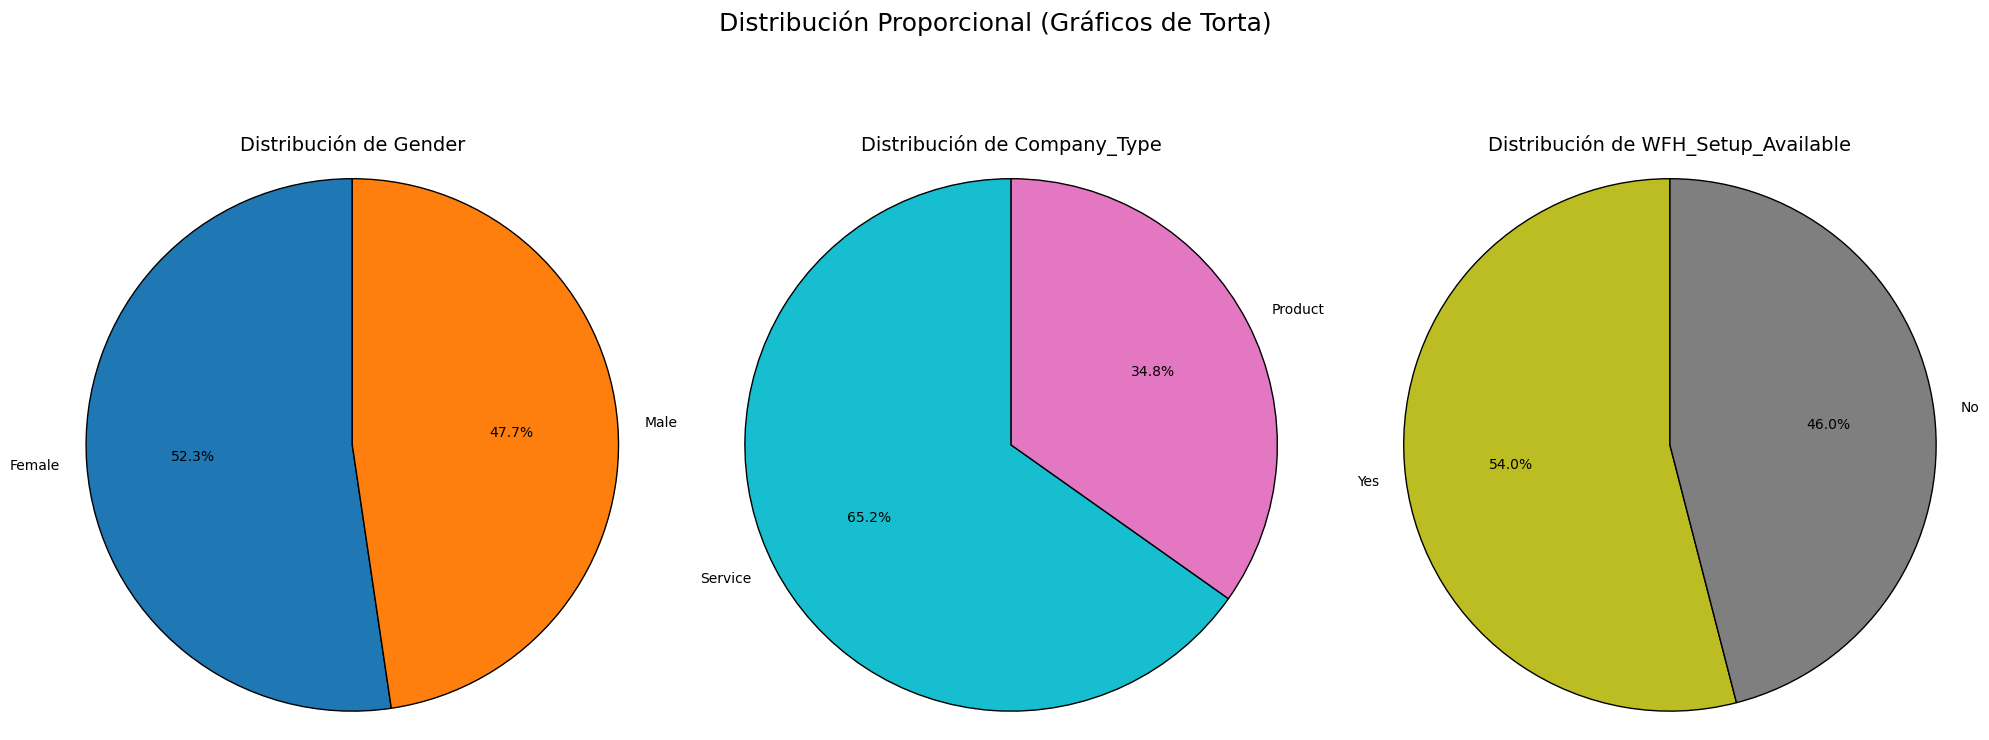

In [32]:
# 1. Definir los tipos de columnas a visualizar
# Variables para Pie Chart
pie_cols = ['Gender', 'Company_Type', 'WFH_Setup_Available']

# Variables Ordinales/Categóricas (para Count Plot)
categorical_cols = [
    'Designation', 'Work-Life_Balance_Score', 'Manager_Support_Score', 
    'Deadline_Pressure_Score', 'Recognition_Frequency'
]

# Columnas Numéricas/Continuas (para Histograma)
numerical_cols = [
    'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate', 
    'Years_in_Company', 'Work_Hours_per_Week', 'Sleep_Hours', 'Team_Size'
]

# GRÁFICOS DE TORTA (Pie Charts)
fig_pie, axes_pie = plt.subplots(1, 3, figsize=(20, 7))
fig_pie.suptitle('Distribución Proporcional (Gráficos de Torta)', fontsize=18, y=1.05)

colors_list = [['#1f77b4', '#ff7f0e', '#2ca02c'], ['#17becf', '#e377c2'], ['#bcbd22', '#7f7f7f']]

for i, col in enumerate(pie_cols):
    ax = axes_pie[i]
    
    # Calcular el conteo de valores y etiquetas
    counts = df[col].value_counts()
    labels = counts.index.tolist()
    values = counts.values.tolist()
    
    # Generar el Pie Chart
    ax.pie(
        values, 
        labels=labels, 
        autopct='%1.1f%%', # Mostrar porcentaje con un decimal
        startangle=90, 
        colors=colors_list[i],
        wedgeprops={'edgecolor': 'black'}
    )
    ax.axis('equal') # Asegura que el gráfico sea un círculo
    ax.set_title(f'Distribución de {col}', fontsize=14)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

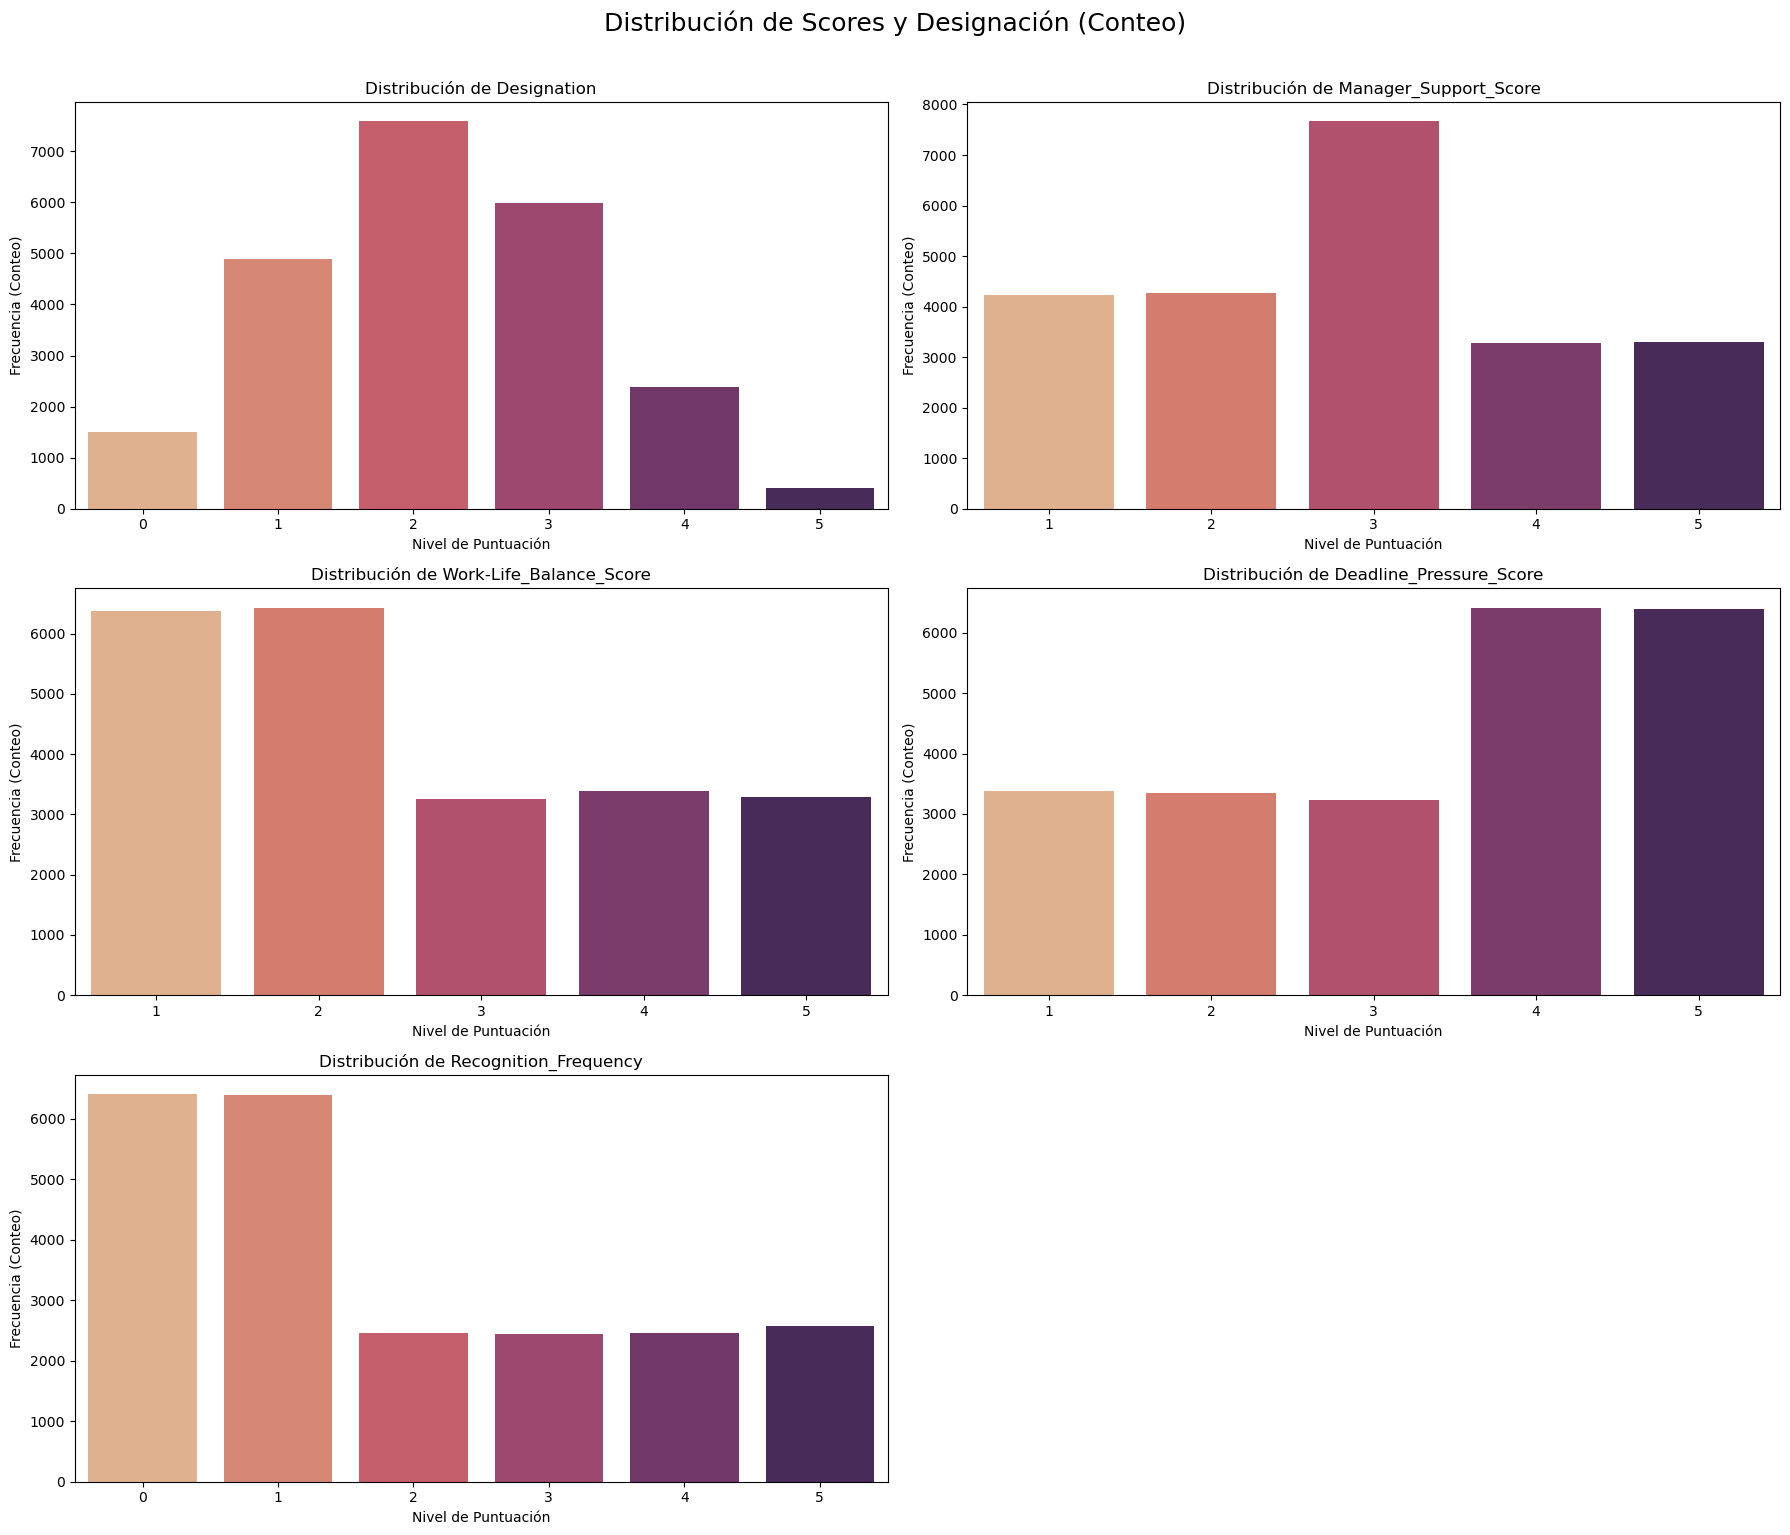

In [36]:
# GRÁFICOS DE VARIABLES CATEGÓRICAS/ORDINALES RESTANTES
categorical_cols_ordered = [
    'Designation', 'Manager_Support_Score', 
    'Work-Life_Balance_Score', 'Deadline_Pressure_Score', 'Recognition_Frequency'
]

n_cat = len(categorical_cols_ordered)
# 3 filas x 2 columnas para 5 features (la última queda vacía)
fig_cat, axes_cat = plt.subplots(3, 2, figsize=(18, 15))
fig_cat.suptitle('Distribución de Scores y Designación (Conteo)', fontsize=18, y=1.02)

for i, col in enumerate(categorical_cols_ordered):
    row = i // 2
    col_idx = i % 2
    ax = axes_cat[row, col_idx]

    sns.countplot(data=df, x=col, hue=col, ax=ax, palette="flare", order=sorted(df[col].unique()), legend=False)
    
    ax.tick_params(axis='x', rotation=0)
    ax.set_title(f'Distribución de {col}', fontsize=12)
    ax.set_ylabel('Frecuencia (Conteo)')
    ax.set_xlabel('Nivel de Puntuación')
    
# Eliminar el subplot vacío
fig_cat.delaxes(axes_cat.flatten()[n_cat])
    
plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()


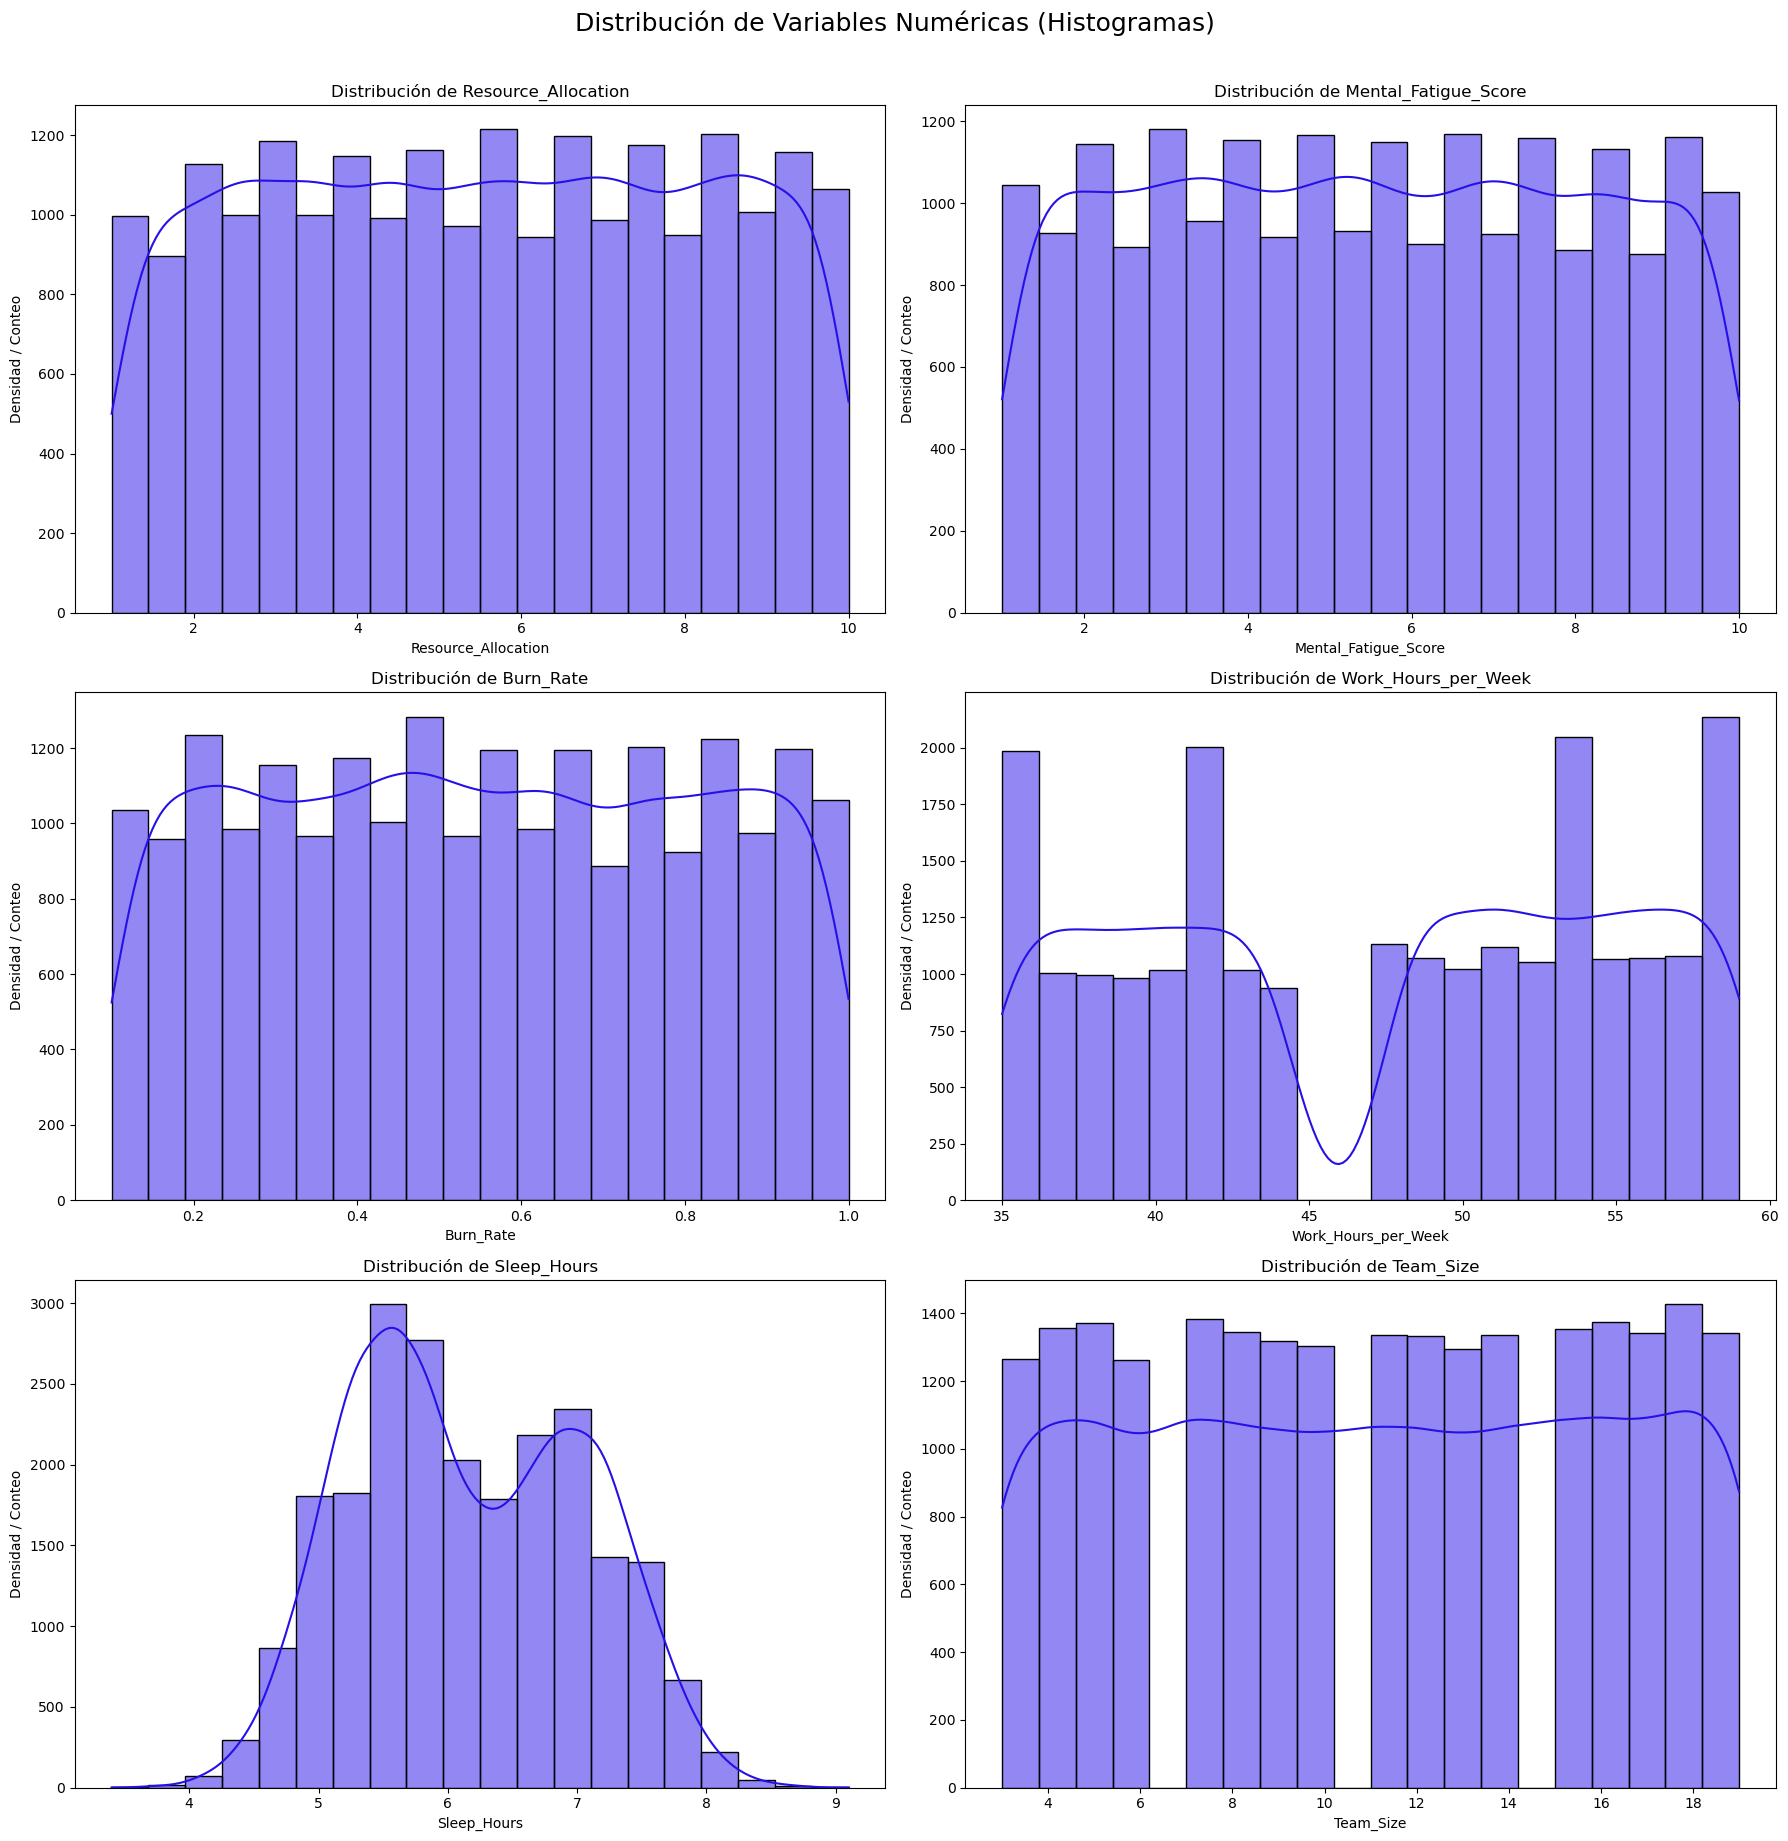

In [29]:
# GRÁFICOS DE VARIABLES NUMÉRICAS 

n_num = len(numerical_cols)
# 3 filas x 2 columnas para 6 features + 1 (Team_Size) -> 4x2
fig_num, axes_num = plt.subplots(3, 2, figsize=(18, 18))
fig_num.suptitle('Distribución de Variables Numéricas (Histogramas)', fontsize=18, y=1.02)

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    ax = axes_num[row, col_idx]

    # Usamos histplot para variables numéricas (incluye manejo de NAs)
    # Bins automáticos y kde para estimación de densidad
    sns.histplot(df, x=col, kde=True, ax=ax, color="#2610e8", bins=20, edgecolor='black')
    
    # Añadir título
    ax.set_title(f'Distribución de {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad / Conteo')

# Eliminar el subplot vacío (si hay un número impar de features, 7 en este caso)
if n_num % 2 != 0:
    fig_num.delaxes(axes_num.flatten()[n_num])

plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

## Correlación

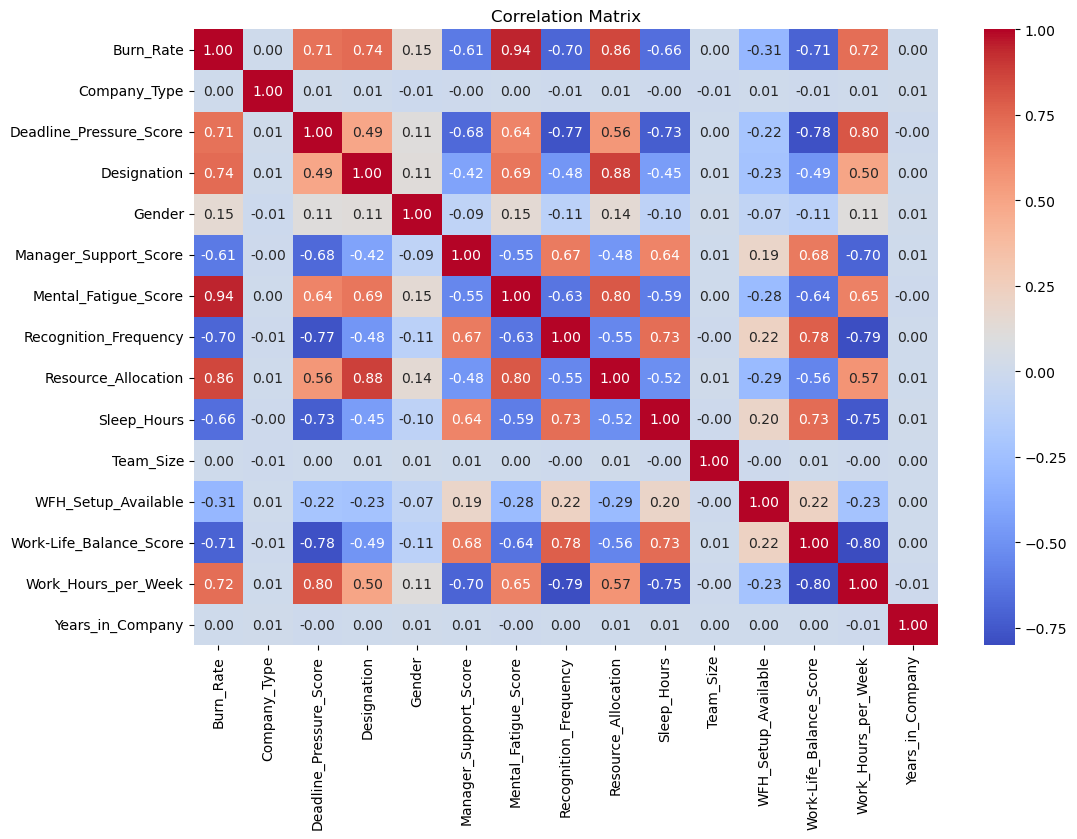

In [101]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Podemos apreciar que tanto `Years in Company` como `Team Size` y `Company Type` no tienen correlación alguna con la variable target ni con las demás features.

In [102]:
# Verificamos qué features están más correlacionadas con target
corr_mx = df.corr().Burn_Rate.abs().sort_values(ascending=False)[1:]
print("Ranking de correlación (>=50%):")
for i, row in enumerate(corr_mx):
    if row > 0.5:
        print(f"{i+1}º {corr_mx.index[i].replace("_"," ")} ({row*100:.1f}%)")

Ranking de correlación (>=50%):
1º Mental Fatigue Score (94.5%)
2º Resource Allocation (85.6%)
3º Designation (73.8%)
4º Work Hours per Week (72.0%)
5º Work-Life Balance Score (70.8%)
6º Deadline Pressure Score (70.8%)
7º Recognition Frequency (69.6%)
8º Sleep Hours (65.5%)
9º Manager Support Score (60.9%)


Vemos aquellas features que pueden ser más útiles como predictores del target.

Serán especialmente útiles `Mental Fatigue Score` y `Resource Allocation`.

## Variable Target
La **variable objetivo** (`Burn Rate`) fue convertida a clases ("Low," "Medium," "High") con umbrales 0.33 y 0.66. Luego, se aplicó un **`OrdinalEncoder`** ya que poseen una **naturaleza ordenada** o jerárquica intrínseca.

---
## Proceso ETL _(Extract, Transform & Load)_

### 1. Extract (Extracción)
* **`cargar_datos()`**: El proceso comienza extrayendo los datos desde el archivo CSV (`enriched_employee_dataset.csv`) y cargándolos en un DataFrame de pandas.

### 2. Transform (Transformación)
Esta es la fase más extensa y se compone de múltiples etapas de limpieza y preprocesamiento:

1. ***Limpieza de Columnas y Nulos:***
    1.  **`eliminar_columnas()`**: Se eliminan columnas consideradas irrelevantes para el modelo, como `Employee ID`, `Date of Joining` y `Years in Company`.
    2.  **`eliminar_nulos_columna()`**: Se eliminan las filas donde la variable objetivo (`Burn Rate`) es nula, ya que son inútiles para el entrenamiento supervisado.
    3.  **`eliminar_nulos_multiples()`**: Se eliminan filas que contienen dos o más valores nulos en cualquiera de sus columnas para asegurar una calidad mínima de los datos.

2. ***División y Preparación del Dataset:***
    1.  **`split_dataset()`**: El conjunto de datos se divide en dos: 80% para entrenamiento (`X_train`, `y_train`) y 20% para prueba (`X_test`, `y_test`). Esto es crucial para evitar la fuga de datos (data leakage).

3. ***Imputación y Modificación de Features:***
    1.  **`imputar_variables()`**: Se utiliza un imputador multivariado (`IterativeImputer` o MICE) para rellenar los valores nulos restantes en las variables predictoras. El imputador se entrena solo con los datos de `X_train` y luego se aplica para transformar tanto `X_train` como `X_test`.
    2.  **`clasificar_burn_rate()`**: La variable objetivo `Burn Rate`, que es continua, se transforma en una variable categórica con tres niveles: "Low", "Medium" y "High". Esto convierte el problema de regresión en un problema de clasificación.
    3.  **`codificar_target()`**: La nueva variable objetivo categórica se codifica numéricamente usando `OrdinalEncoder` (Low=0, Medium=1, High=2), que es un formato que los modelos de ML pueden procesar.
    4.  **`codificar_categoricas()`**: Las variables categóricas predictoras (`Gender`, `Company Type`, `WFH Setup Available`) se transforman usando `OneHotEncoder`. Esto crea nuevas columnas binarias para cada categoría, evitando que el modelo asuma un orden inexistente entre ellas.

### 3. Load (Carga)
* Los DataFrames procesados (`X_train_codif`, `X_test_codif`, `y_train_encoded`, `y_test_encoded`) se cargan en memoria y quedan listos para ser utilizados directamente en el entrenamiento y evaluación de los modelos.